# @ftnext
# Pillowで画像処理してモザイクアートを作る

## モジュールのインポート

In [1]:
import csv

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from mosaic_art import calc


#Jupyterでインライン表示するための宣言
%matplotlib inline

## 定数宣言

In [2]:
DOT_AREA_ONE_SIDE = 10
THUMBNAIL_ONE_SIDE = 40
# 2つの色(R,G,B)の間の最大の距離
MAX_COLOR_DISTANCE = 255**2 * 3
# CSVファイル中のカラムの意味づけ
POS_NAME  = 0
POS_RED   = 1
POS_GREEN = 2
POS_BLUE  = 3

## 関数定義

In [3]:
def materials_list_from_file(filename):
    """Returns a list which contains material image information.

    Args:
        filename: File name such as "foo.csv"
            The file contains information on average color of image.
            (Average color maens the average of the values of R of all pixels,
             the average of the values of G of all pixels,
             and the average of the values of B of all pixels)
            A row is as follows:
                image_name, R_average, G_average, B_average

    Returns:
        A list of tuples
        Tuple is like (
            image_name   : str (such as "bar.png"),
            red_average  : int,
            green_average: int,
            blue_average : int
            )
    """
    color_data = []
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            image_info = (row[POS_NAME], int(row[POS_RED]),
                          int(row[POS_GREEN]), int(row[POS_BLUE]))
            color_data.append(image_info)
    return color_data

In [4]:
def color_distance(RGB1, RGB2):
    """Returns color distance

    Considering the distance between two points
    (x1, y1, z1) and (x2, y2, z2) in three dimensions

    Args:
        RGB1: A tuple which means (R, G, B)
        RGB2: A tuple which means (R, G, B)

    Returns:
        color distance(:int)

    """
    d2_r = (RGB1[0] - RGB2[0]) ** 2
    d2_g = (RGB1[1] - RGB2[1]) ** 2
    d2_b = (RGB1[2] - RGB2[2]) ** 2
    return d2_r + d2_g + d2_b

In [5]:
def similar_color_filename(average_color, color_data):
    """Returns name of file similar to average color

    Find the image with average color closest to `average_color` from `color_data`

    Args:
        average_color: a tuple which means (R, G, B) of average color of a certain range
        color_data: A list of tuples
                    Tuple is like (image_name, red_average, green_average, blue_average)

    Returns:
        A name of file such as 'foo.png' (NOT path)
    """
    distance = MAX_COLOR_DISTANCE
    filename = ''
    # 色の差が最小になるファイルを決定(距離に見立てている)
    for color in color_data:
        sample_color = (color[POS_RED], color[POS_GREEN], color[POS_BLUE])
        d = color_distance(average_color, sample_color)
        if d < distance:
            distance = d
            filename = color[POS_NAME]
    return filename

In [6]:
def display_image(image):
    #画像をarrayに変換
    im_list = np.asarray(image)
    #貼り付け
    plt.imshow(im_list)
    #表示
    plt.show()

## モザイクアート（画像の平均の色を使う）

以下の画像でモザイクアートを作りたい
モザイクの領域の色は平均の色とする

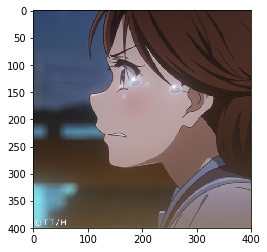

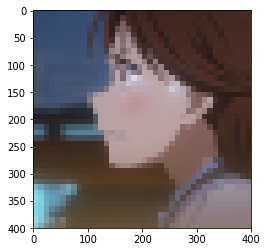

In [7]:
icon_im = Image.open('my_icon.png')
display_image(icon_im)
icon_im_width, icon_im_height = icon_im.size

# 元の画像の平均色の可視化
dot_icon_im = icon_im.copy()
for left in range(0, icon_im_width, DOT_AREA_ONE_SIDE):
    for top in range(0, icon_im_height, DOT_AREA_ONE_SIDE):
        red, green, blue = calc.average_color_in_range(icon_im, left, top,
                            left+DOT_AREA_ONE_SIDE, top+DOT_AREA_ONE_SIDE)
        average_color_im = Image.new('RGBA',
                                     (DOT_AREA_ONE_SIDE, DOT_AREA_ONE_SIDE),
                                     (red, green, blue, 255)) # a=0だと透明で何も見えない
        dot_icon_im.paste(average_color_im, (left, top))
display_image(dot_icon_im)

素材画像の平均の色を見てみる

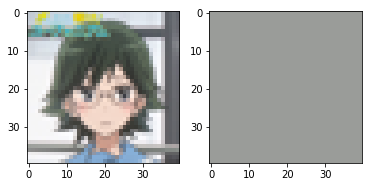

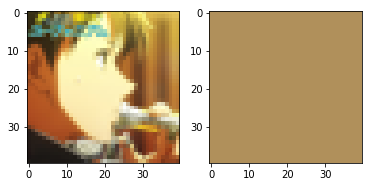

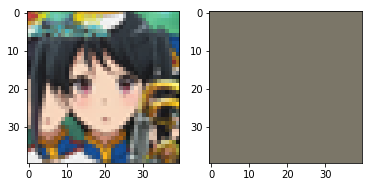

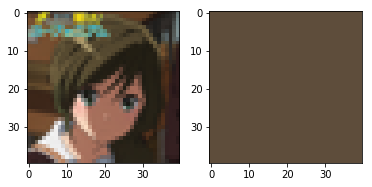

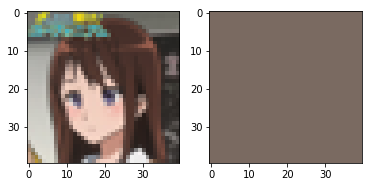

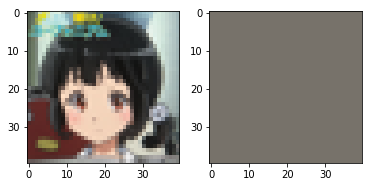

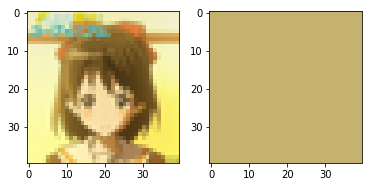

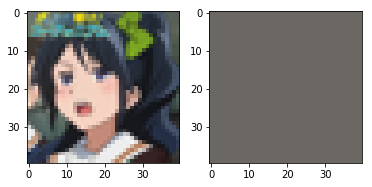

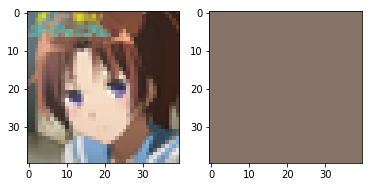

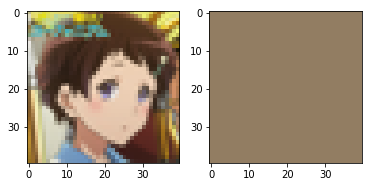

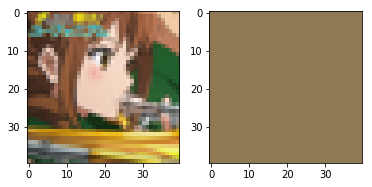

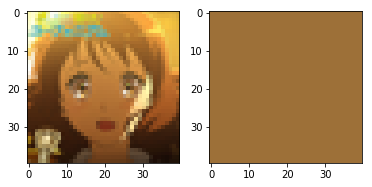

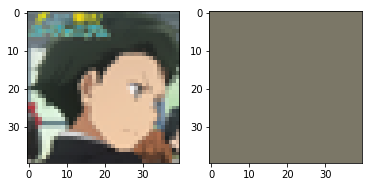

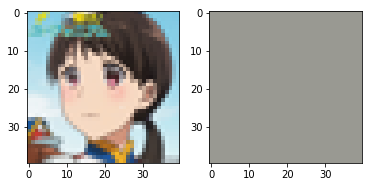

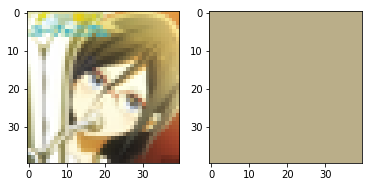

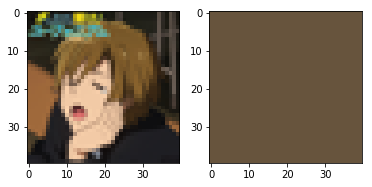

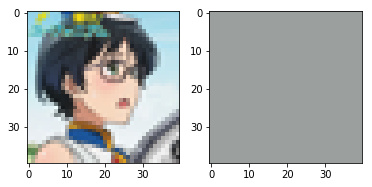

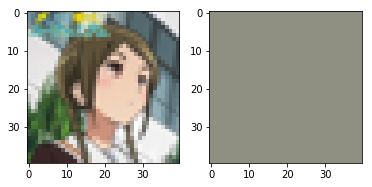

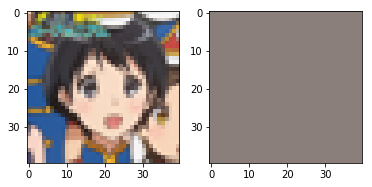

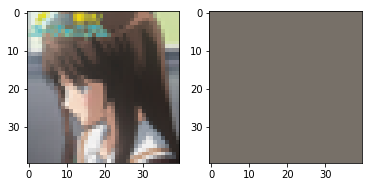

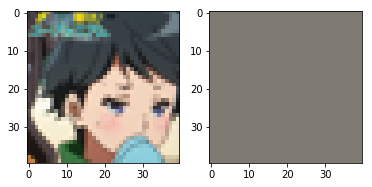

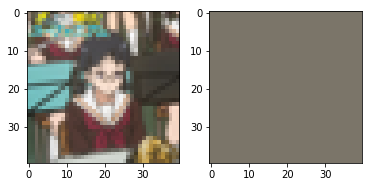

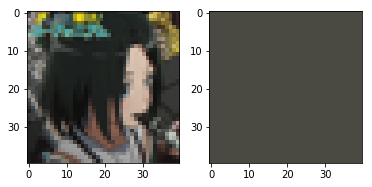

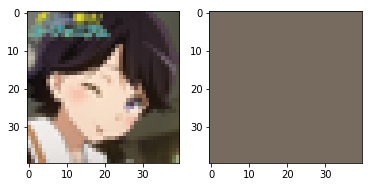

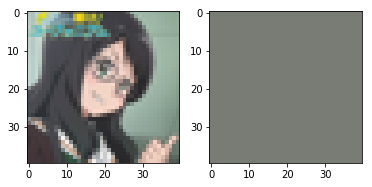

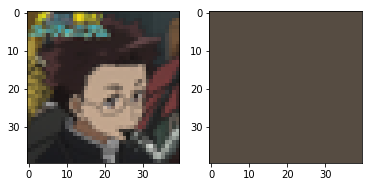

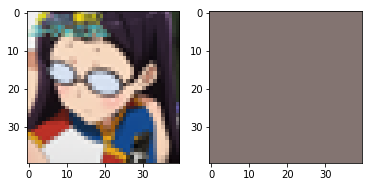

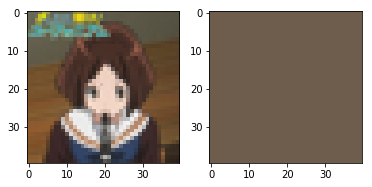

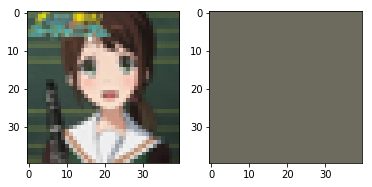

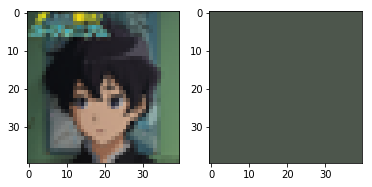

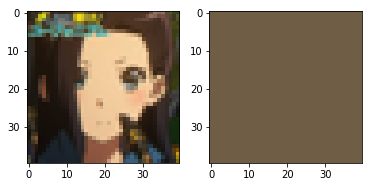

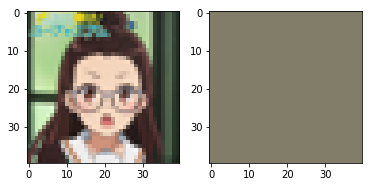

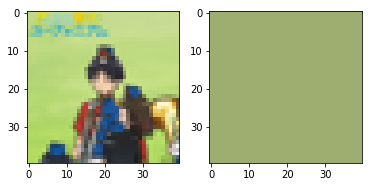

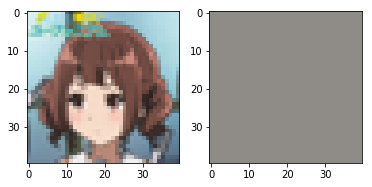

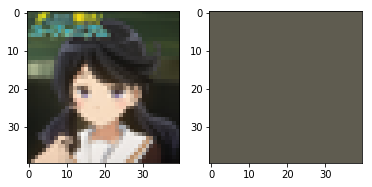

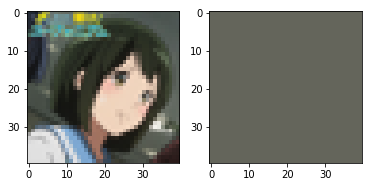

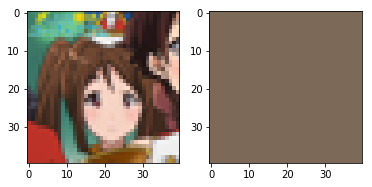

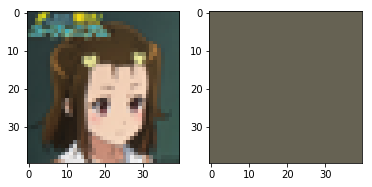

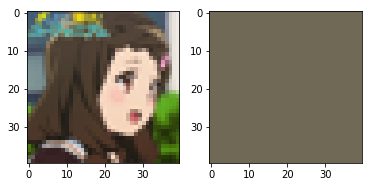

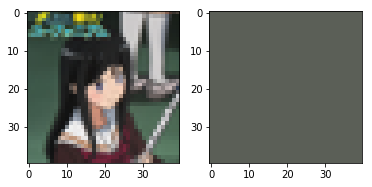

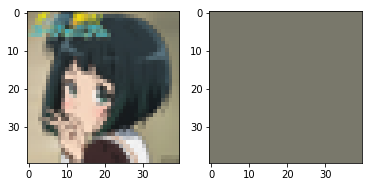

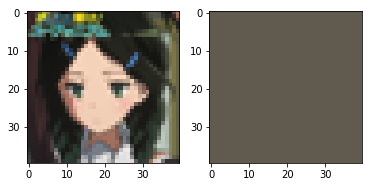

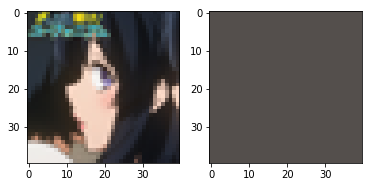

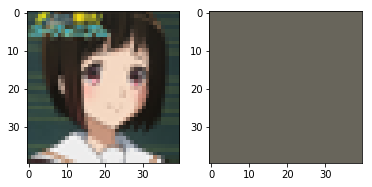

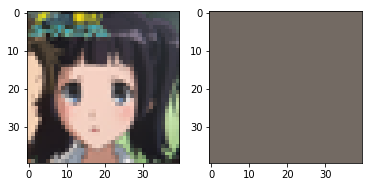

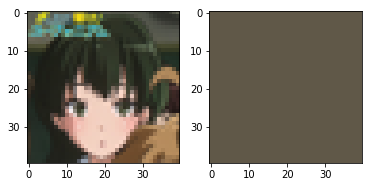

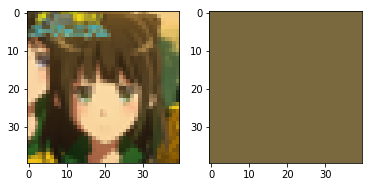

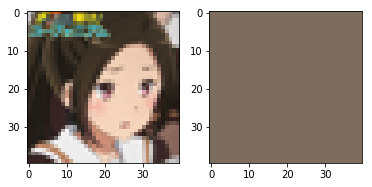

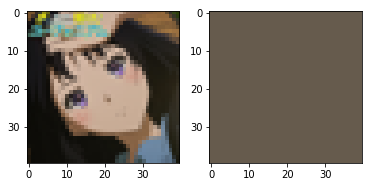

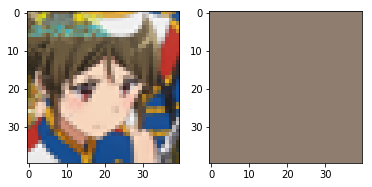

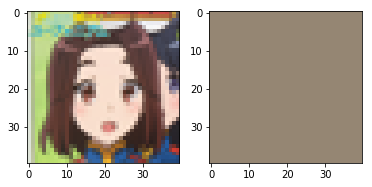

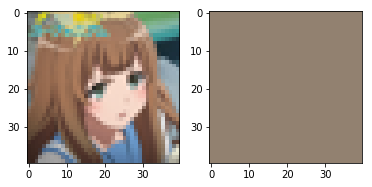

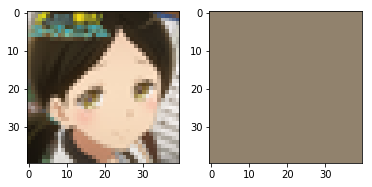

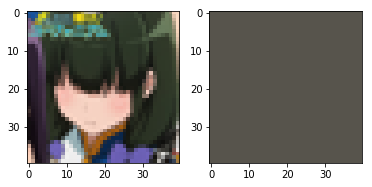

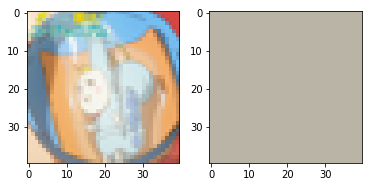

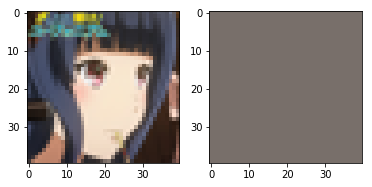

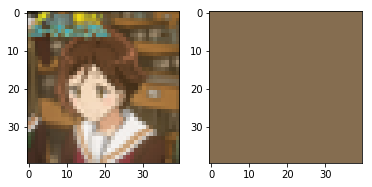

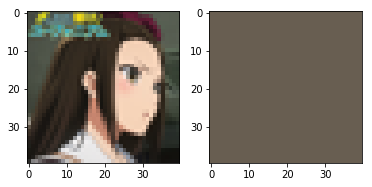

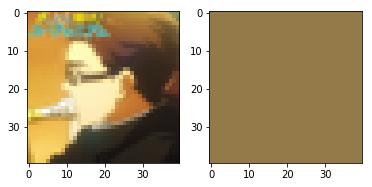

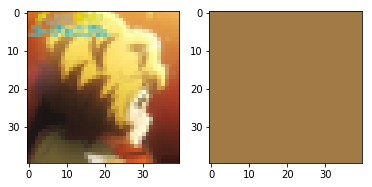

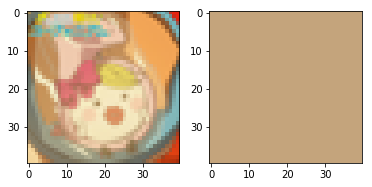

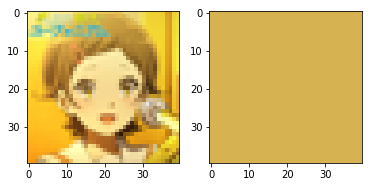

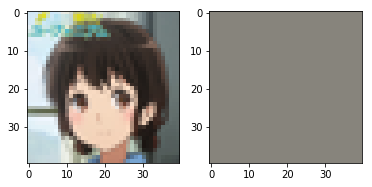

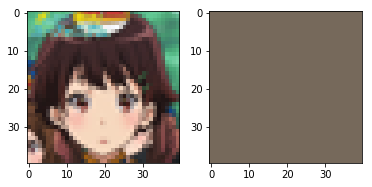

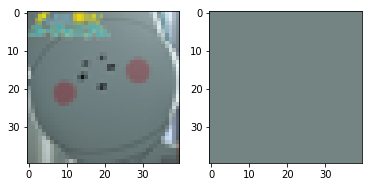

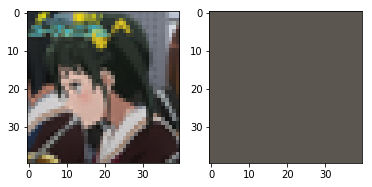

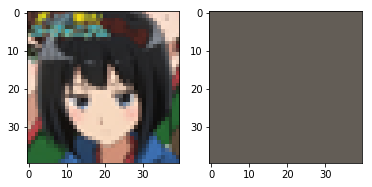

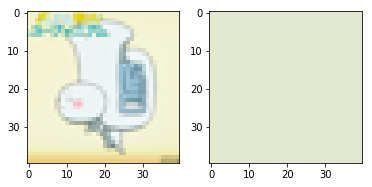

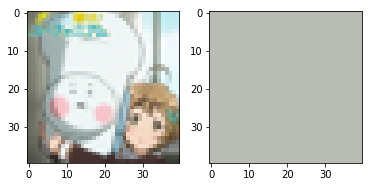

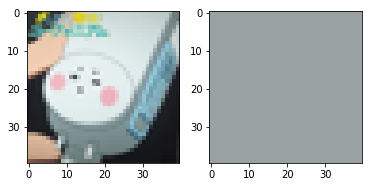

In [8]:
filename = 'average_color.csv'
with open(filename, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        image_info = (row[POS_NAME], int(row[POS_RED]),
                      int(row[POS_GREEN]), int(row[POS_BLUE]))
        material_im = Image.open('image/euph_part_icon/'+image_info[POS_NAME])
        material_im.thumbnail((THUMBNAIL_ONE_SIDE, THUMBNAIL_ONE_SIDE))
        color_im = Image.new('RGBA', (THUMBNAIL_ONE_SIDE, THUMBNAIL_ONE_SIDE),
                             (image_info[POS_RED], image_info[POS_GREEN], image_info[POS_BLUE])) #aが必要?
        #画像をarrayに変換
        material_im_list = np.asarray(material_im)
        plt.subplot(121)
        #貼り付け
        plt.imshow(material_im_list)

        #画像をarrayに変換
        color_im_list = np.asarray(color_im)
        plt.subplot(122)
        #貼り付け
        plt.imshow(color_im_list)
        #表示
        plt.show()

In [ ]:
素材画像の色の平均の情報を使ってモザイクアートを作ってみる

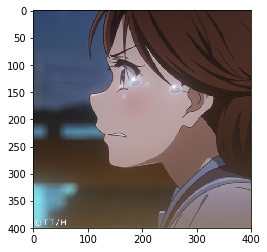

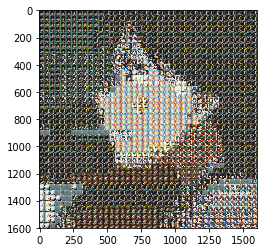

In [13]:
color_data = materials_list_from_file('average_color.csv')

icon_im = Image.open('my_icon.png')
display_image(icon_im)
icon_im_width, icon_im_height = icon_im.size

# # 元の画像の平均色の可視化
# dot_icon_im = icon_im.copy()
# for left in range(0, icon_im_width, DOT_AREA_ONE_SIDE):
#     for top in range(0, icon_im_height, DOT_AREA_ONE_SIDE):
#         red, green, blue = calc.average_color_in_range(icon_im, left, top,
#                             left+DOT_AREA_ONE_SIDE, top+DOT_AREA_ONE_SIDE)
#         average_color_im = Image.new('RGBA',
#                                      (DOT_AREA_ONE_SIDE, DOT_AREA_ONE_SIDE),
#                                      (red, green, blue, 255)) # a=0だと透明で何も見えない
#         dot_icon_im.paste(average_color_im, (left, top))
# display_image(dot_icon_im)

mosaic_icon_im = Image.new('RGBA', (1600, 1600))
for left in range(0, icon_im_width, DOT_AREA_ONE_SIDE):
    for top in range(0, icon_im_height, DOT_AREA_ONE_SIDE):
        average_color = calc.average_color_in_range(icon_im, left, top,
                            left+DOT_AREA_ONE_SIDE, top+DOT_AREA_ONE_SIDE)
        if len(average_color) != 3:
            continue

        filename = similar_color_filename(average_color, color_data)
        # 距離最小のファイルを縮小して1600×1600の画像に貼り付け
        area_im = Image.open('image/euph_part_icon/'+filename)
        area_im.thumbnail((THUMBNAIL_ONE_SIDE, THUMBNAIL_ONE_SIDE))
        mosaic_icon_im.paste(area_im, (left//DOT_AREA_ONE_SIDE * THUMBNAIL_ONE_SIDE,
                                       top//DOT_AREA_ONE_SIDE * THUMBNAIL_ONE_SIDE))

save_path = 'product/my_icon_mosaic_mean.png'
mosaic_icon_im.save(save_path)

# Display Image ##### @@@@@ #####
#画像の読み込み
im = Image.open(save_path)
display_image(im)

## モザイクアート（画像の色のうち真ん中に来るものを使う）

以下の画像でモザイクアートを作りたい
モザイクの領域の色は真ん中に来る色とする

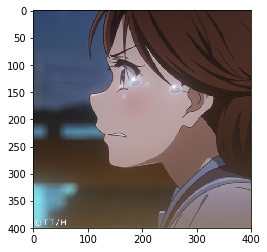

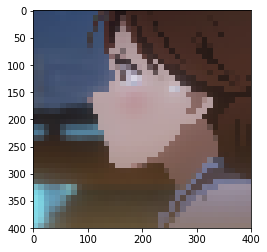

In [9]:
icon_im = Image.open('my_icon.png')
display_image(icon_im)
icon_im_width, icon_im_height = icon_im.size

# 元の画像の中央色の可視化
dot_icon_im = icon_im.copy()
for left in range(0, icon_im_width, DOT_AREA_ONE_SIDE):
    for top in range(0, icon_im_height, DOT_AREA_ONE_SIDE):
        red, green, blue = calc.median_color_in_range(icon_im, left, top,
                            left+DOT_AREA_ONE_SIDE, top+DOT_AREA_ONE_SIDE)
        average_color_im = Image.new('RGBA',
                                     (DOT_AREA_ONE_SIDE, DOT_AREA_ONE_SIDE),
                                     (red, green, blue, 255)) # a=0だと透明で何も見えない
        dot_icon_im.paste(average_color_im, (left, top))
display_image(dot_icon_im)

In [ ]:
素材画像の真ん中の色を見てみる

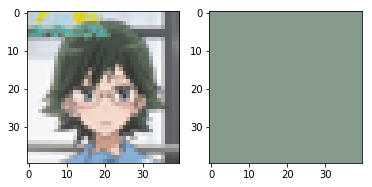

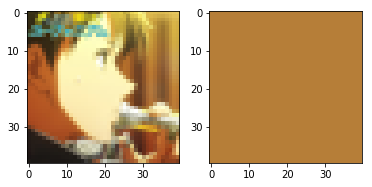

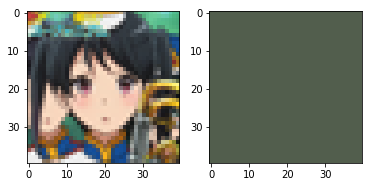

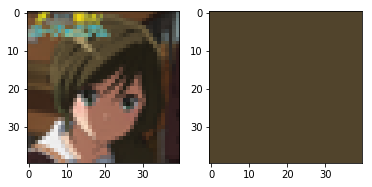

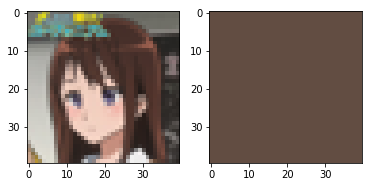

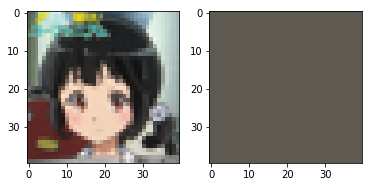

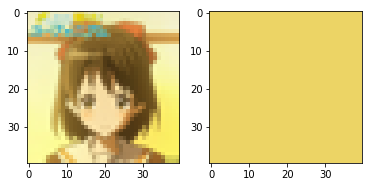

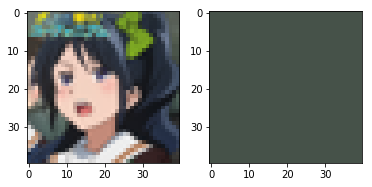

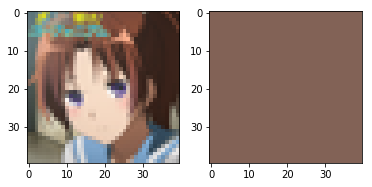

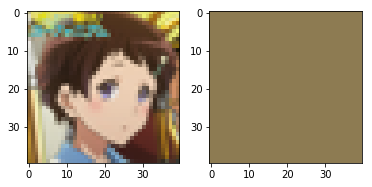

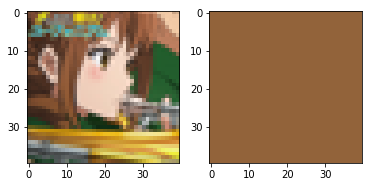

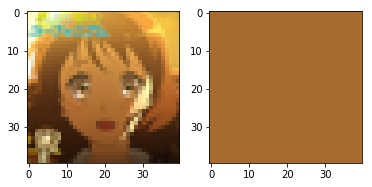

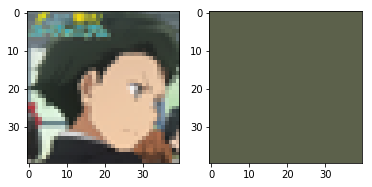

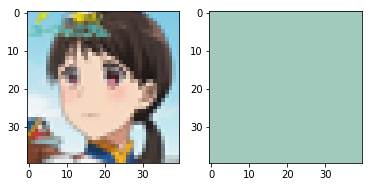

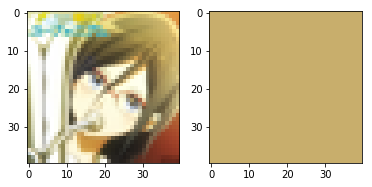

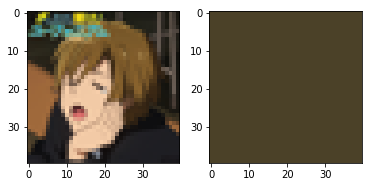

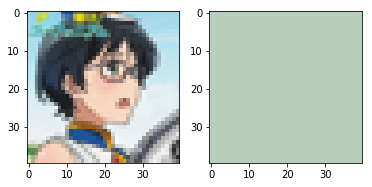

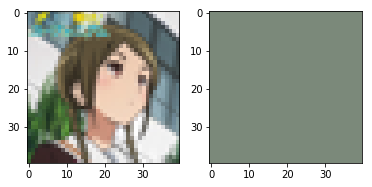

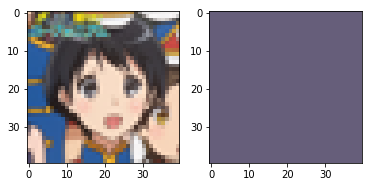

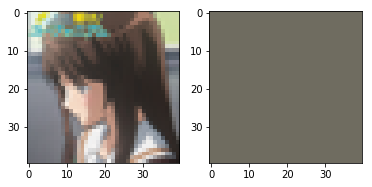

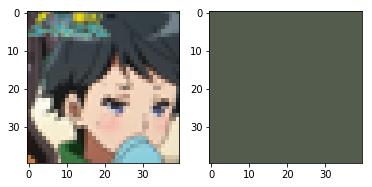

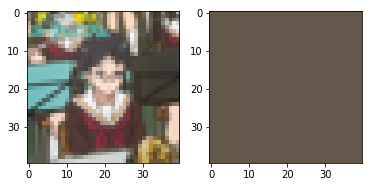

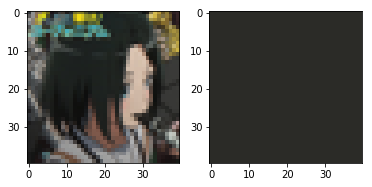

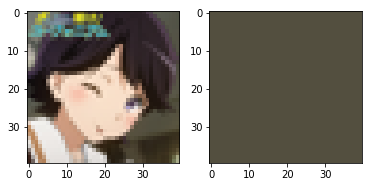

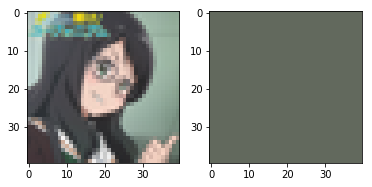

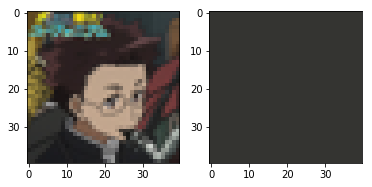

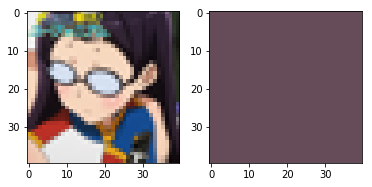

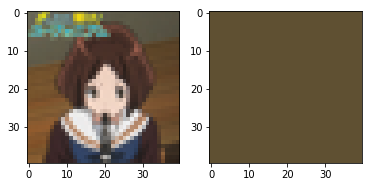

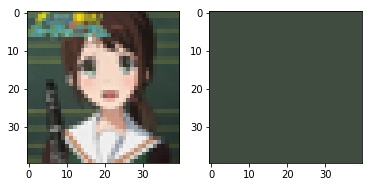

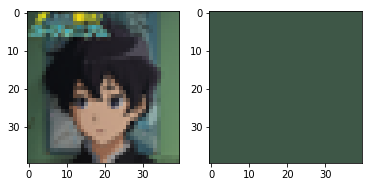

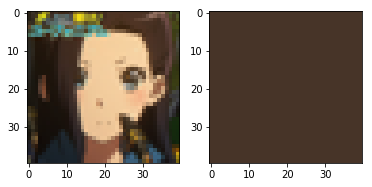

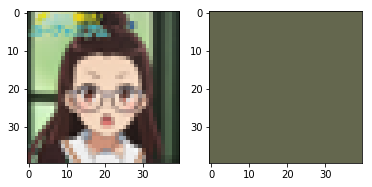

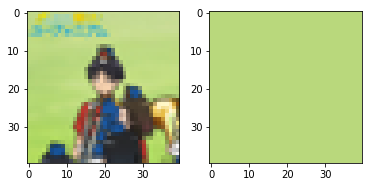

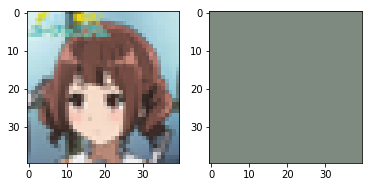

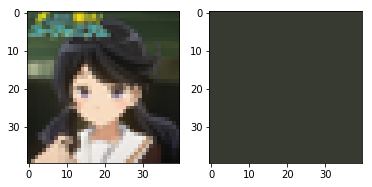

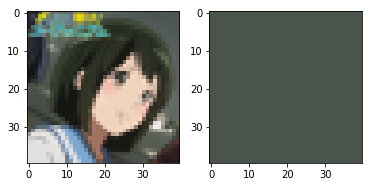

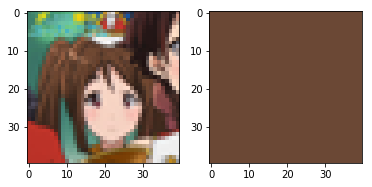

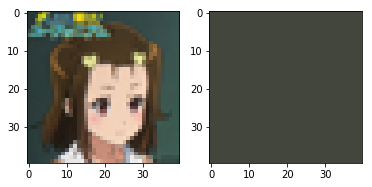

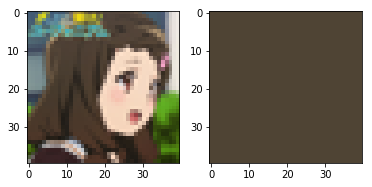

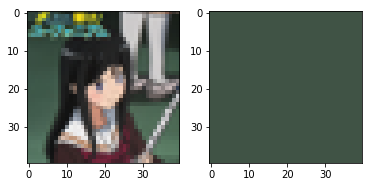

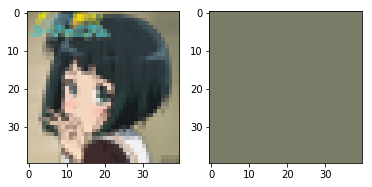

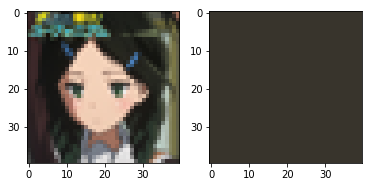

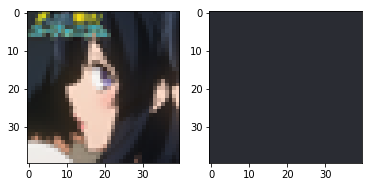

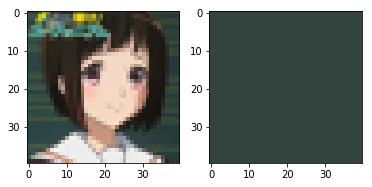

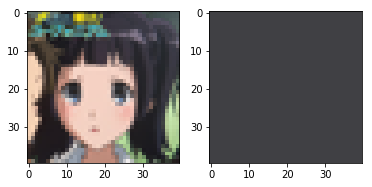

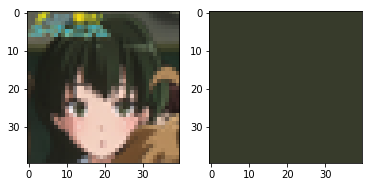

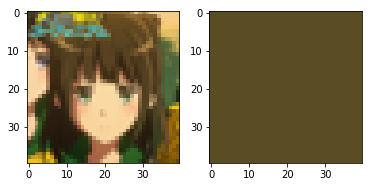

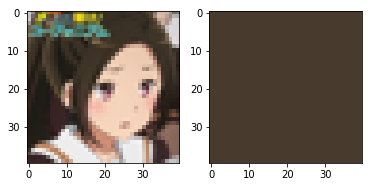

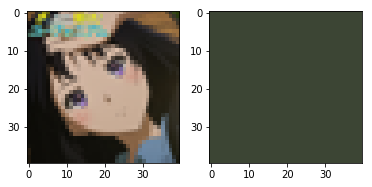

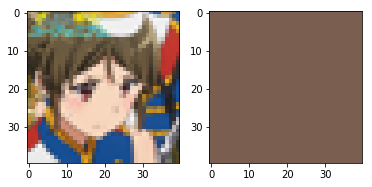

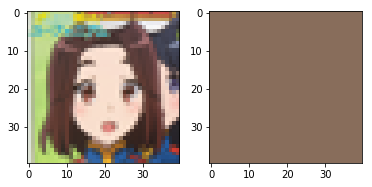

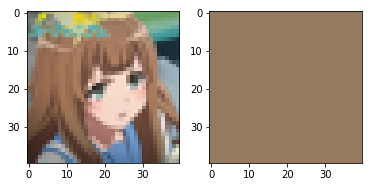

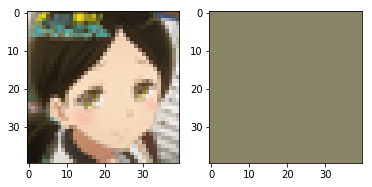

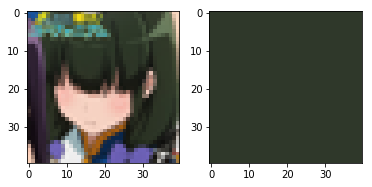

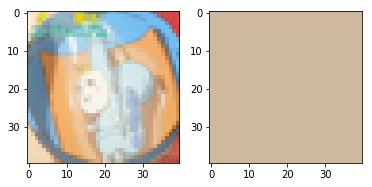

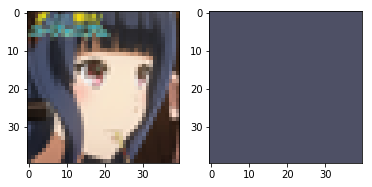

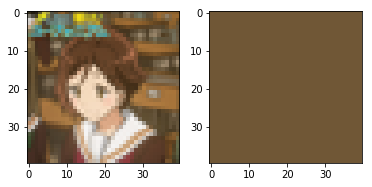

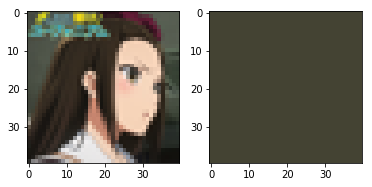

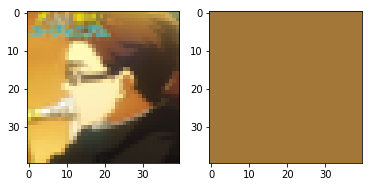

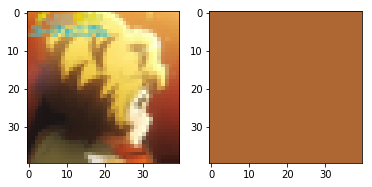

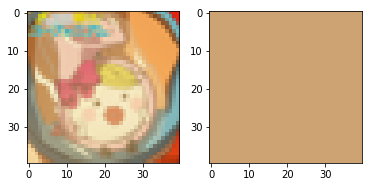

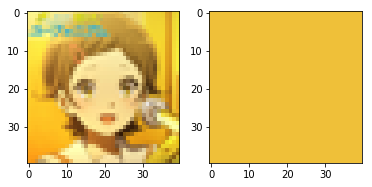

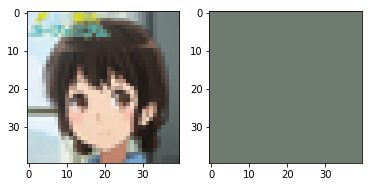

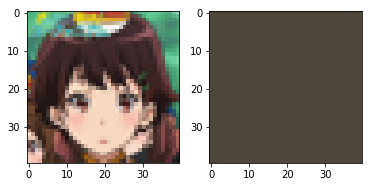

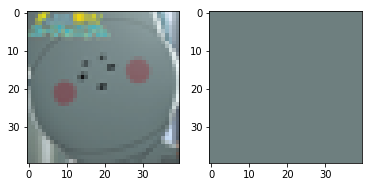

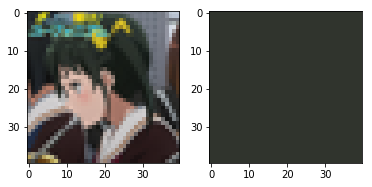

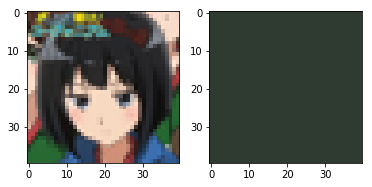

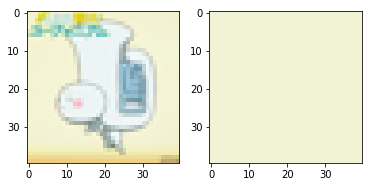

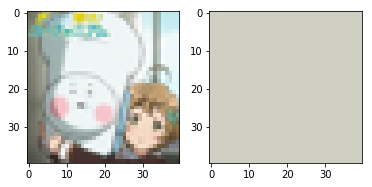

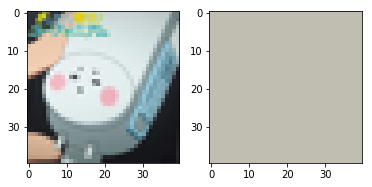

In [10]:
filename = 'median_color.csv'
with open(filename, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        image_info = (row[POS_NAME], int(row[POS_RED]),
                      int(row[POS_GREEN]), int(row[POS_BLUE]))
        material_im = Image.open('image/euph_part_icon/'+image_info[POS_NAME])
        material_im.thumbnail((THUMBNAIL_ONE_SIDE, THUMBNAIL_ONE_SIDE))
        color_im = Image.new('RGBA', (THUMBNAIL_ONE_SIDE, THUMBNAIL_ONE_SIDE),
                             (image_info[POS_RED], image_info[POS_GREEN], image_info[POS_BLUE])) #aが必要?
        #画像をarrayに変換
        material_im_list = np.asarray(material_im)
        plt.subplot(121)
        #貼り付け
        plt.imshow(material_im_list)

        #画像をarrayに変換
        color_im_list = np.asarray(color_im)
        plt.subplot(122)
        #貼り付け
        plt.imshow(color_im_list)
        #表示
        plt.show()

In [ ]:
素材画像の真ん中の色の情報を使ってモザイクアートを作ってみる

In [14]:
color_data = materials_list_from_file('median_color.csv')

icon_im = Image.open('my_icon.png')
icon_im_width, icon_im_height = icon_im.size
mosaic_icon_im = Image.new('RGBA', (1600, 1600))

for left in range(0, icon_im_width, DOT_AREA_ONE_SIDE):
    for top in range(0, icon_im_height, DOT_AREA_ONE_SIDE):
        median_color = calc.median_color_in_range(icon_im, left, top,
                            left+DOT_AREA_ONE_SIDE, top+DOT_AREA_ONE_SIDE)
        if len(median_color) != 3:
            continue

        filename = similar_color_filename(median_color, color_data)
        # 距離最小のファイルを1600×1600の画像に貼り付け
        area_im = Image.open('material/euph_part_icon/'+filename)
        mosaic_icon_im.paste(area_im, (left//DOT_AREA_ONE_SIDE * THUMBNAIL_ONE_SIDE,
                                       top//DOT_AREA_ONE_SIDE * THUMBNAIL_ONE_SIDE))

mosaic_icon_im.save('product/my_icon_mosaic_median.png')

## モザイクアート（画像で一番使われている色を使う）

以下の画像でモザイクアートを作りたい
モザイクの領域の色は領域で一番使われている色とする

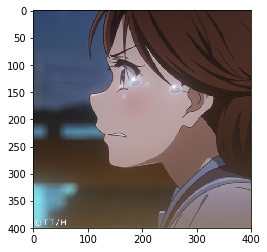

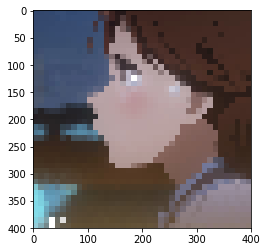

In [11]:
icon_im = Image.open('my_icon.png')
display_image(icon_im)
icon_im_width, icon_im_height = icon_im.size

# 元の画像の最頻色の可視化
dot_icon_im = icon_im.copy()
for left in range(0, icon_im_width, DOT_AREA_ONE_SIDE):
    for top in range(0, icon_im_height, DOT_AREA_ONE_SIDE):
        red, green, blue = calc.mode_color_in_range(icon_im, left, top,
                            left+DOT_AREA_ONE_SIDE, top+DOT_AREA_ONE_SIDE)
        average_color_im = Image.new('RGBA',
                                     (DOT_AREA_ONE_SIDE, DOT_AREA_ONE_SIDE),
                                     (red, green, blue, 255)) # a=0だと透明で何も見えない
        dot_icon_im.paste(average_color_im, (left, top))
display_image(dot_icon_im)

In [ ]:
素材画像で一番使われている色を見てみる

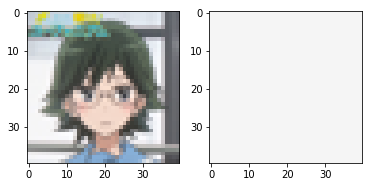

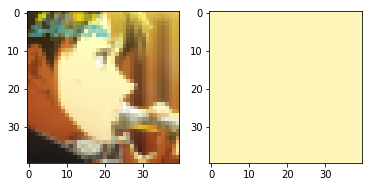

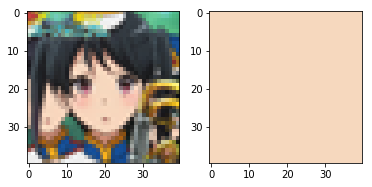

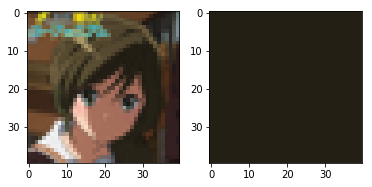

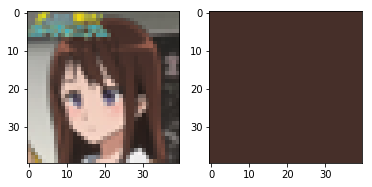

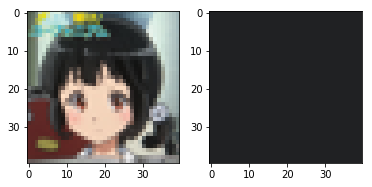

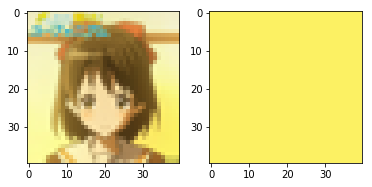

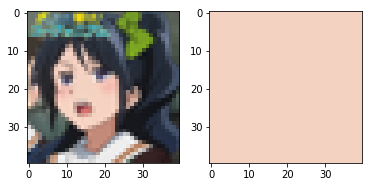

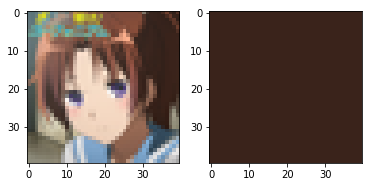

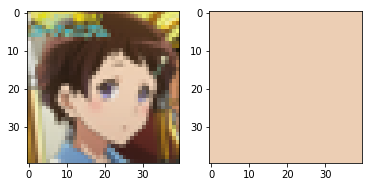

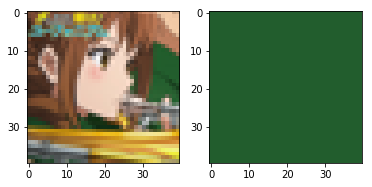

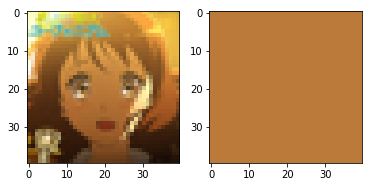

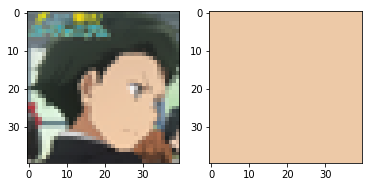

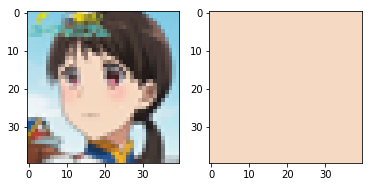

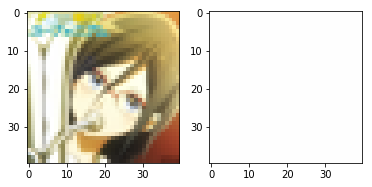

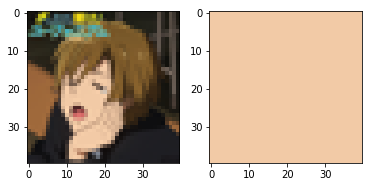

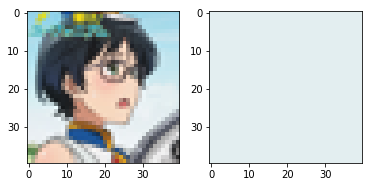

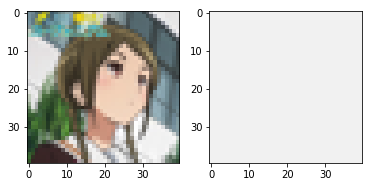

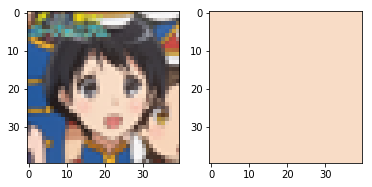

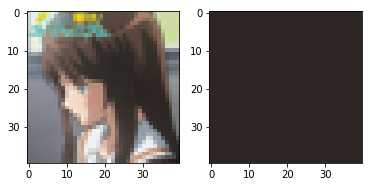

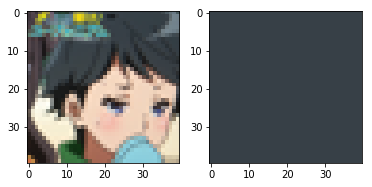

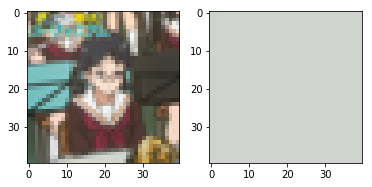

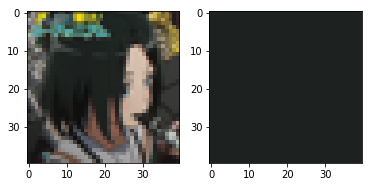

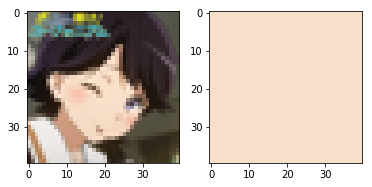

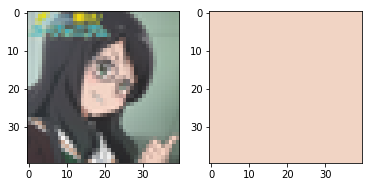

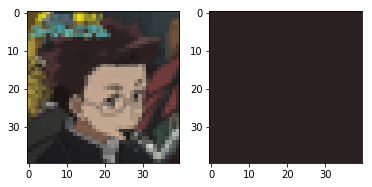

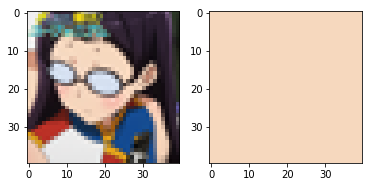

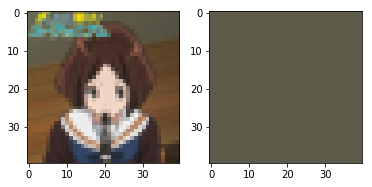

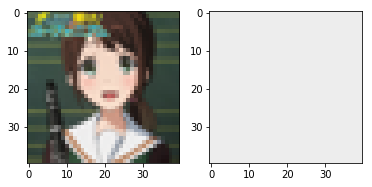

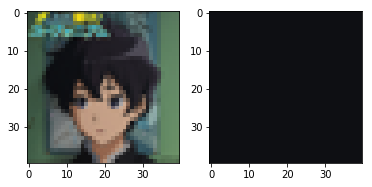

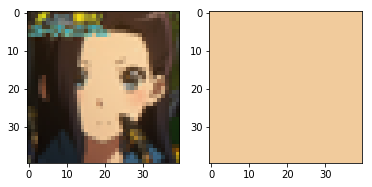

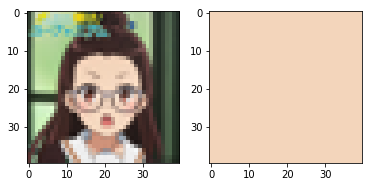

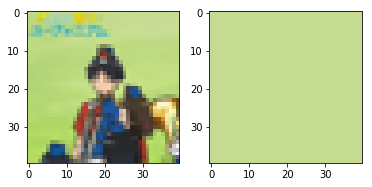

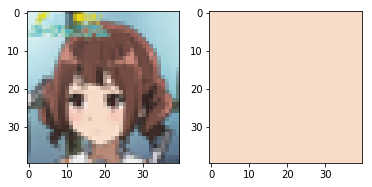

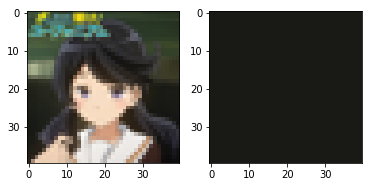

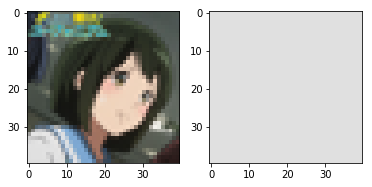

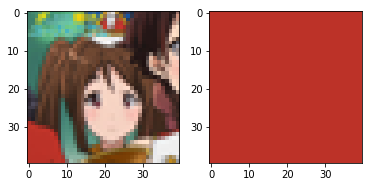

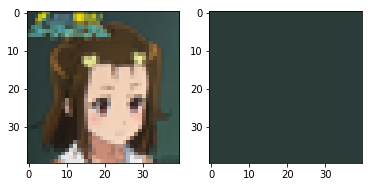

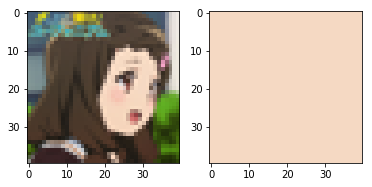

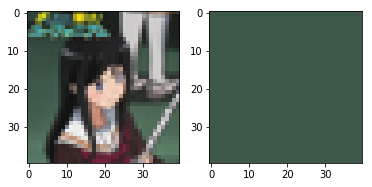

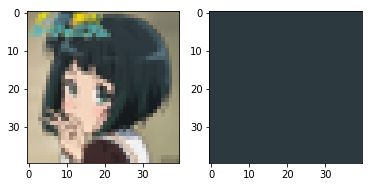

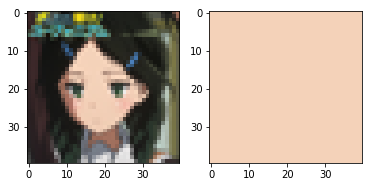

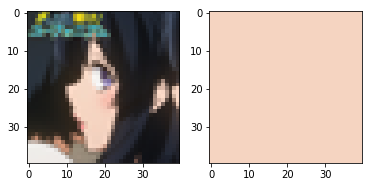

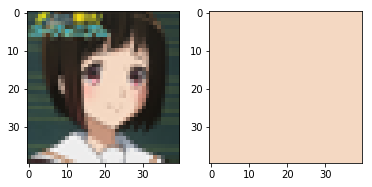

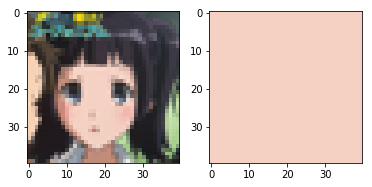

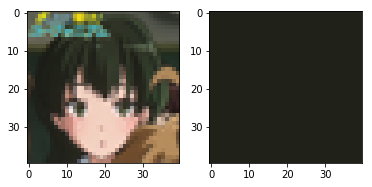

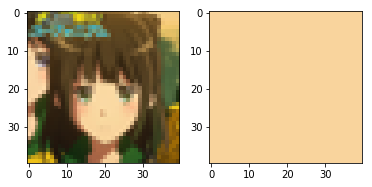

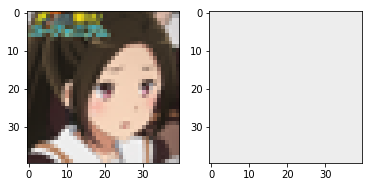

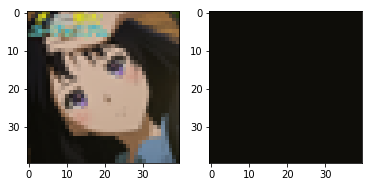

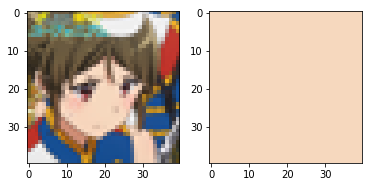

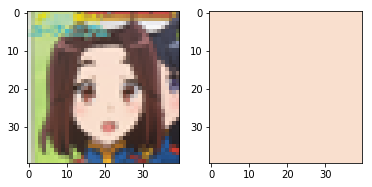

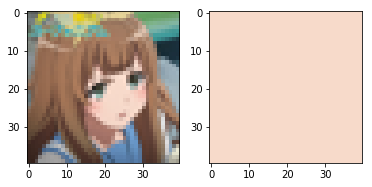

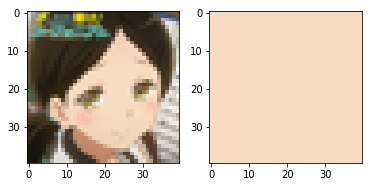

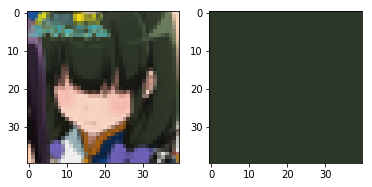

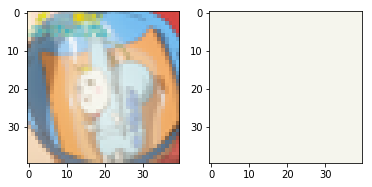

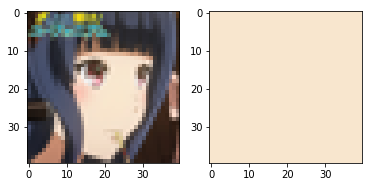

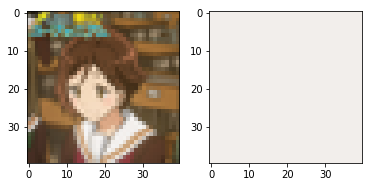

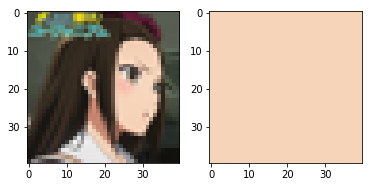

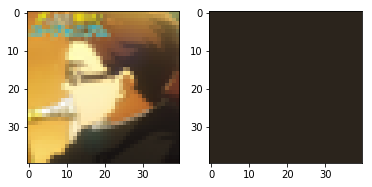

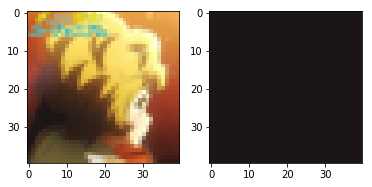

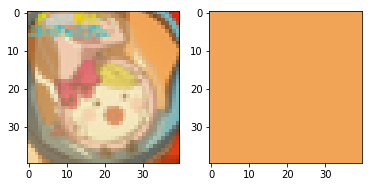

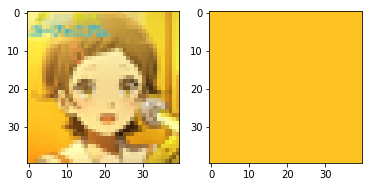

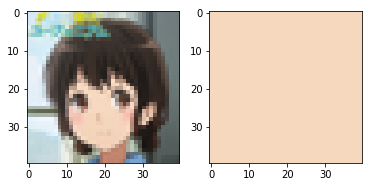

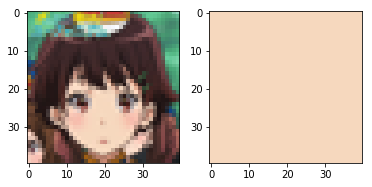

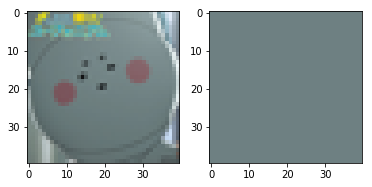

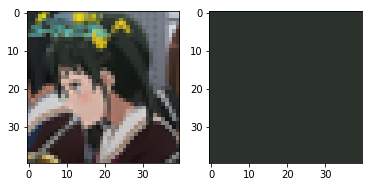

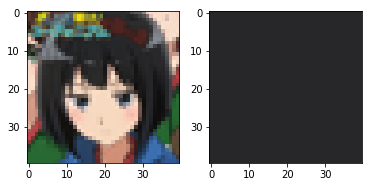

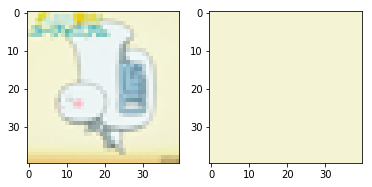

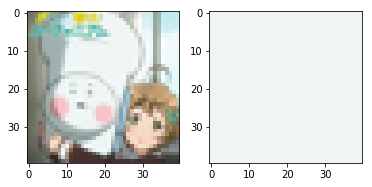

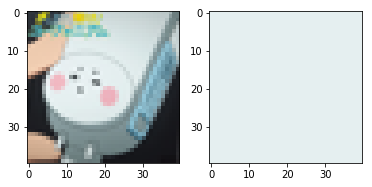

In [12]:
filename = 'mode_color.csv'
with open(filename, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        image_info = (row[POS_NAME], int(row[POS_RED]),
                      int(row[POS_GREEN]), int(row[POS_BLUE]))
        material_im = Image.open('image/euph_part_icon/'+image_info[POS_NAME])
        material_im.thumbnail((THUMBNAIL_ONE_SIDE, THUMBNAIL_ONE_SIDE))
        color_im = Image.new('RGBA', (THUMBNAIL_ONE_SIDE, THUMBNAIL_ONE_SIDE),
                             (image_info[POS_RED], image_info[POS_GREEN], image_info[POS_BLUE])) #aが必要?
        #画像をarrayに変換
        material_im_list = np.asarray(material_im)
        plt.subplot(121)
        #貼り付け
        plt.imshow(material_im_list)

        #画像をarrayに変換
        color_im_list = np.asarray(color_im)
        plt.subplot(122)
        #貼り付け
        plt.imshow(color_im_list)
        #表示
        plt.show()

In [ ]:
素材画像で一番使われている色の情報を使ってモザイクアートを作ってみる

In [ ]:
color_data = materials_list_from_file('mode_color.csv')

icon_im = Image.open('my_icon.png')
icon_im_width, icon_im_height = icon_im.size
mosaic_icon_im = Image.new('RGBA', (1600, 1600))

for left in range(0, icon_im_width, DOT_AREA_ONE_SIDE):
    for top in range(0, icon_im_height, DOT_AREA_ONE_SIDE):
        mode_color = calc.mode_color_in_range(icon_im, left, top,
                            left+DOT_AREA_ONE_SIDE, top+DOT_AREA_ONE_SIDE)
        if len(mode_color) != 3:
            continue

        filename = similar_color_filename(mode_color, color_data)
        # 距離最小のファイルを1600×1600の画像に貼り付け
        area_im = Image.open('material/euph_part_icon/'+filename)
        mosaic_icon_im.paste(area_im, (left//DOT_AREA_ONE_SIDE * THUMBNAIL_ONE_SIDE,
                                       top//DOT_AREA_ONE_SIDE * THUMBNAIL_ONE_SIDE))

mosaic_icon_im.save('product/my_icon_mosaic_mode.png')

# 今後
平均、中央値、最頻値どれを使うのが適切か見極める

最終的にはどんな画像からでもモザイクアートにできるように